In [1]:
import pyvisa
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


In [2]:
data=np.load('./sig_f700+1.3k+2k_230303/f700+f2000.npy',allow_pickle=True)[0]

In [3]:
print('SR:',1/(data[0,1]-data[0,0]))

SR: 500000000.26317793


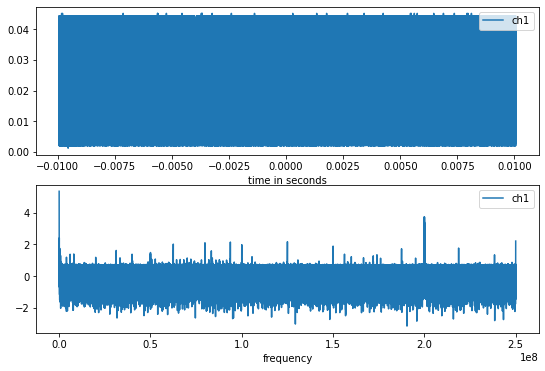

In [4]:
SR=0.5e9
#LOW_PASS_FREQ=1e8
f_ch1_lp=np.fft.rfft(data[1])
freq=np.fft.rfftfreq(data.shape[-1],1/SR)
#f_ch1_lp[freq>=LOW_PASS_FREQ]=0
ch1_lp=np.fft.irfft(f_ch1_lp)

# ch1_lp=(ch1_lp-np.min(ch1_lp))/(np.max(ch1_lp)-np.min(ch1_lp))*2-1


fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(9, 6))
ax1.plot(data[0], ch1_lp[:], label='ch1')
ax1.set_xlabel("time in seconds")
ax1.legend(loc=1)
ax2.plot(freq, np.log10(np.abs(f_ch1_lp)), label='ch1')
#ax2.set_xlim(-10,LOW_PASS_FREQ)
ax2.set_xlabel("frequency")
ax2.legend(loc=1)


In [11]:
ref_signal=np.zeros((2,data.shape[-1])) #[sin,cos]
ref_signal[0]=np.sin(2*np.pi*200e6*data[0])
ref_signal[1]=np.cos(2*np.pi*200e6*data[0])

mix_sig=ref_signal*data[1]


# mix_sin_sig=ref_sin_signal*data[1]
# mix_cos_sig=ref_cos_signal*data[1]

f_mix_sig=np.fft.rfft(mix_sig)

f_mix_sig[:,freq>1e6]=0
mix_sig_lp=np.fft.irfft(f_mix_sig)
pha=np.arctan2(-mix_sig_lp[0],mix_sig_lp[1])

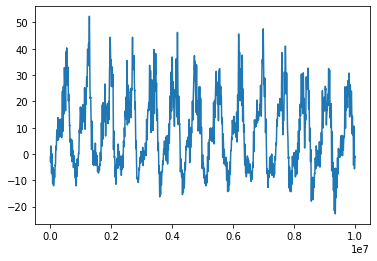

In [12]:
pha=np.unwrap(pha)
plt.plot(pha)

[ 2.51327386 12.75376542]
2.5132741228718345


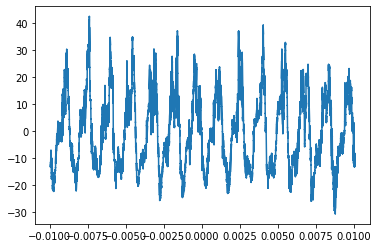

In [7]:
from scipy.signal import hilbert

hil1=hilbert(data[1])
hil2=hilbert(hil1.imag)
pha_cum=np.arctan2(hil1.imag,-hil2.imag)
pha_cum=np.unwrap(pha_cum)

#-- OLS
p = np.poly1d(np.polyfit(np.arange(pha_cum.size), pha_cum, 1))
carry_phase=p(np.arange(pha_cum.size))

pha_hil=pha_cum-carry_phase
print(np.polyfit(np.arange(pha_cum.size), pha_cum, 1))
print(2*np.pi*200e6/SR)
plt.plot(data[0],pha_hil)

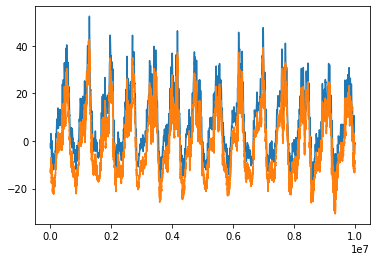

In [13]:
plt.plot(pha)
plt.plot(pha_hil)

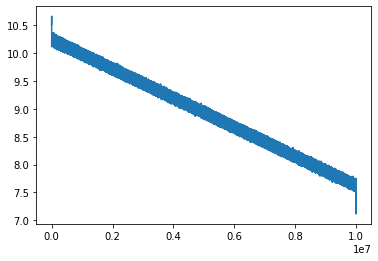

In [17]:
plt.plot(pha-pha_hil)

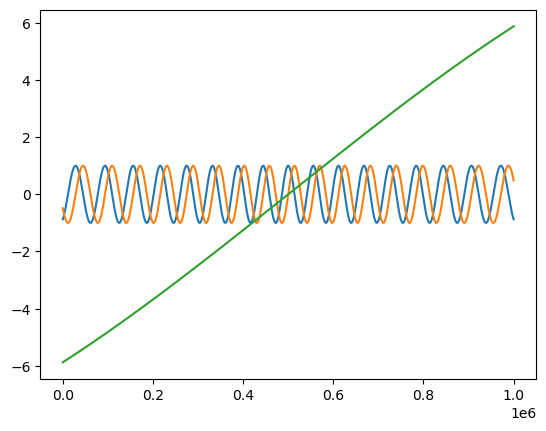

In [49]:
xdata=np.linspace(-0.5,0.5,num=1000000)
phase=30*np.sin(2*np.pi*0.2*xdata)
i_sig=np.cos(3*phase)
q_sig=np.sin(3*phase)
plt.plot(i_sig)
plt.plot(q_sig)
plt.plot(phase/3)

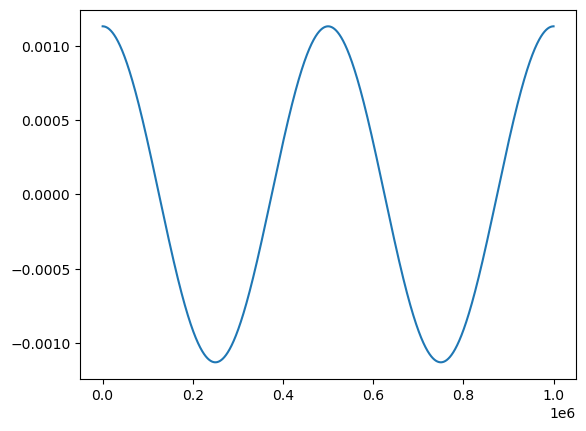

In [48]:
m_sig=(i_sig[1:]*np.diff(q_sig)-np.diff(i_sig)*q_sig[1:])/(i_sig[1:]**2+q_sig[1:]**2)
plt.plot(m_sig)